In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

import datetime
import pytz

In [3]:
import requests

url = "http://www.newyorksocialdiary.com/party-pictures?page=2"
response = requests.get(url)

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text)
#print soup.prettify()

In [5]:
parent_div = soup.find('div', attrs={'class': 'view-content'}) #Find (at most) *one*
party_divs = parent_div.find_all('div', attrs={'class':'views-row'})  #Find *all*
print len(party_divs)
print party_divs[0].prettify()

50
<div class="views-row views-row-1 views-row-odd views-row-first">
 <span class="views-field views-field-title">
  <span class="field-content">
   <a href="/party-pictures/2015/mission-accomplished">
    Mission Accomplished
   </a>
  </span>
 </span>
 <span class="views-field views-field-created">
  <span class="field-content">
   Thursday, February 26, 2015
  </span>
 </span>
</div>



In [6]:
date_div = soup.find_all('span', attrs={'class': 'views-field views-field-created'}) #Find (at most) *one*
#party_divs = parent_div.find_all('div', attrs={'class':'views-row'})  #Find *all*
print len(date_div)

date = []
for x in range(0, len(date_div)):
    date.append(date_div[x].text.encode('ascii','ignore'))
print date

print type(date[0])

from datetime import datetime
date2 = []
for y in range(0, len(date_div)):
    date2.append(datetime.strptime(date[y], " %A, %B %d, %Y ")< datetime(2014, 12, 1, 0, 0))
    
print date2
print type(date2[0])

50
[' Thursday, February 26, 2015 ', ' Wednesday, February 25, 2015 ', ' Monday, February 23, 2015 ', ' Wednesday, February 18, 2015 ', ' Wednesday, February 11, 2015 ', ' Monday, February 9, 2015 ', ' Friday, February 6, 2015 ', ' Thursday, February 5, 2015 ', ' Monday, February 2, 2015 ', ' Friday, January 30, 2015 ', ' Monday, January 26, 2015 ', ' Friday, January 23, 2015 ', ' Wednesday, January 21, 2015 ', ' Wednesday, January 14, 2015 ', ' Monday, January 12, 2015 ', ' Friday, January 2, 2015 ', ' Monday, December 29, 2014 ', ' Monday, December 22, 2014 ', ' Friday, December 19, 2014 ', ' Thursday, December 18, 2014 ', ' Wednesday, December 17, 2014 ', ' Monday, December 15, 2014 ', ' Thursday, December 11, 2014 ', ' Monday, December 8, 2014 ', ' Wednesday, December 3, 2014 ', ' Monday, December 1, 2014 ', ' Monday, November 24, 2014 ', ' Thursday, November 20, 2014 ', ' Tuesday, November 18, 2014 ', ' Monday, November 17, 2014 ', ' Thursday, November 13, 2014 ', ' Wednesday, Nov

In [74]:
firsta = party_divs[0].select('a')[0]
print firsta.text
print firsta['href']

Dining with the Divas
/party-pictures/2015/dining-with-the-divas


In [5]:
from collections import namedtuple
TechBasic = namedtuple('TechBasic', 'title, url')

def td_info(td):
    la = td.select('a')
    #ls = td.select('span')
    if len(la) != 1: #or len(ls) != 1:
        print "Uh oh! We did something wrong for:"
        print "\n".join(">>> " + line for line in td.prettify().split("\n"))
        return
    return TechBasic(title=la[0].text, url=la[0]['href'])#, short=ls[0].text)

tech_links0 = [td_info(td) for td in party_divs if td_info(td) is not None]

tech_links = []

for i in range(0,len(tech_links0)):
    if datetime.strptime(date[i], " %A, %B %d, %Y ")< datetime(2014, 12, 1, 0, 0):  
       tech_links.append(tech_links0[i])
        
        
#tech_links = [i for i in tech_links0[i] if date2[i] == 'TRUE']

print type(tech_links)
print len(tech_links)
#print tech_links[0].title
print tech_links
#print tech_links[0]


############################
############################


NameError: name 'party_divs' is not defined

In [175]:
L = []
for p in range(3,27): 

    url = "http://www.newyorksocialdiary.com/party-pictures?page="+str(p)
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    parent_div = soup.find('div', attrs={'class': 'view-content'}) #Find (at most) *one*
    party_divs = parent_div.find_all('div', attrs={'class':'views-row'})  #Find *all*
    tech_links = [td_info(td) for td in party_divs if td_info(td) is not None]
    #L += tech_links
    #L.append(party_divs)
    L.append(tech_links)
    #print tech_links

import operator
L2 = reduce(operator.add, L)
print len(L2)

1166


50

In [183]:
L3 = L2+ tech_links
print len(L3)

1182


In [6]:
from urlparse import urljoin

#TechDetailed = namedtuple('TechDetailed', 'tech_basic, patents')

url_base="http://www.newyorksocialdiary.com"

def get_tech_details(response):
    soup = BeautifulSoup(response.text)

    #caption_a = soup.find_all('div', attrs={'class': 'photocaption'})
    #caption_c = soup.find_all('td', attrs={'class': 'photocaption'})
    caption_b = soup.find_all(face="Verdana, Arial, Helvetica, sans-serif")
    #caption_a1 = [i.text for i in caption_a]
    #caption_c1 = [i.text for i in caption_c]
    caption_b1 = [i.text for i in caption_b]
    
    caption_d = soup.find_all(class_= 'photocaption')
    caption_d1 = [i.text for i in caption_d]
    caption_com = caption_d1 + caption_b1
   # caption_com = caption_a1 + caption_c1
    #patents = [patent_info(a) for a in soup.select('dd.us_patent_issued a')]
    #caption2 = caption.text
    #
    #caption2.extend(caption3)
    return caption_com

tech_details = [get_tech_details(requests.get(urljoin(url_base, tech_basic.url)))
               for tech_basic in L3]
import operator
caplist1 = reduce(operator.add, tech_details)
print len(caplist1)
#print captions

NameError: name 'L3' is not defined

In [489]:
caplist2 = [i.strip().encode('ascii','ignore') for i in caplist1 if len(i)<=250]
caplist3 = [i for i in caplist2 if str(i) != '' ] #101231
caplist4 = [i for i in caplist3 if str(i) != 'Click here for NYSD Contents' ]
captions = caplist4
print len(caplist4)

108570


In [7]:
import os
import simplejson
disk = open('captions.txt','w')

In [491]:
simplejson.dump(captions, disk)

In [8]:
disk.close()

In [493]:
test = open('captions.txt','r')


In [494]:
x = simplejson.load(test)


In [495]:
len(x)

108570

In [3]:
import os
import simplejson
caption0 = open('captions trail5 all cleaned.txt','r')
caption = simplejson.load(caption0)
print len(caption)

108570


In [300]:
import re
caption1 = []
for a in caption:
    caption1.append(re.sub(r'(photographs\sby.*)$|(\([^)]+\))|(\bat.*$)|\n|\b(a\s)?(friend|State\sRepresentative|his\swife|the|honorable|Dr\.|Sen|PhD|MD|President|Mayor|Senator|Mr|Mrs|Click\shere\sfor\sNYSD\sContents)(s)?', '', a, flags=re.IGNORECASE))

In [301]:
#a = "aPhotographs Photographs by Cutty McGill (Easter); Rob Rich/516-676-3939 (Boy's Town). aat at yyy a friend friends"
a = 'Lionel\n                  and Dotty Goldfrank'
print a
print re.sub(r'\([^)]+\)', 'XXXXXXXXXXXXX', a, flags=re.IGNORECASE)
print re.sub(r'\n', '', a, flags=re.IGNORECASE)
print re.sub(r'(\bphotographs\sby)|(\([^)]+\))|(\bat)|\b(a\s)?friend(s)?', '', a, flags=re.IGNORECASE)
#print re.search(r'photographs\sby.*\B',  a, flags=re.IGNORECASE).group()

Lionel
                  and Dotty Goldfrank
Lionel
                  and Dotty Goldfrank
Lionel                  and Dotty Goldfrank
Lionel
                  and Dotty Goldfrank


In [302]:


regex = re.compile("([a-zA-Z\d]+)\s+and\s+([a-zA-Z\d]+)\s+([a-zA-Z\d]+)")

caption1_5 = [" ".join(a.strip().split()) for a in caption1]
caption2 = caption1_5
for line in range(0, len(caption1_5)):
        m = regex.match(caption1_5[line])
        if m:
            caption2[line] = m.groups()[0]+' '+m.groups()[2]+' and '+m.groups()[1]+' '+m.groups()[2]

print caption1[0:10]
print caption1_5[0:10]
print caption2[0:10]

['Julian Lethbridge, Tess Lethbridge,Simon Chase, Anne Bass , and Scott Rothkopf ', 'Peter Vaughn and Anne Bass ', 'Steve Hochberg and Hillary Lane Hochberg', 'Peter Vaughn and Kirsten Peckerman ', " Arthur O'Neill and Ruby O'Neill", 'Christine Flynn  and Paul Segal', 'Bill and Joanna Seitz', 'Natalie Millstein, Jim Millstein , Julian Lethbridge, Morris Adjmi, and Rick Childs', 'Dixie and David Deluca', 'Chuck and Jane Klein']
['Julian Lethbridge, Tess Lethbridge,Simon Chase, Anne Bass , and Scott Rothkopf', 'Peter Vaughn and Anne Bass', 'Steve Hochberg and Hillary Lane Hochberg', 'Peter Vaughn and Kirsten Peckerman', "Arthur O'Neill and Ruby O'Neill", 'Christine Flynn and Paul Segal', 'Bill Seitz and Joanna Seitz', 'Natalie Millstein, Jim Millstein , Julian Lethbridge, Morris Adjmi, and Rick Childs', 'Dixie Deluca and David Deluca', 'Chuck Klein and Jane Klein']
['Julian Lethbridge, Tess Lethbridge,Simon Chase, Anne Bass , and Scott Rothkopf', 'Peter Vaughn and Anne Bass', 'Steve Hoch

In [303]:
a = ['safaa and safdas', ['sfds and sdf', 'sfa'],'sdfa anderw']

for a1 in range(len(a)):
    a2 in range(len(a1)):
        a[a1][a2] = re.sub('and','',a2)

SyntaxError: invalid syntax (<ipython-input-303-6715a8b2487f>, line 4)

In [304]:
#test = re.split('\,|\.|\;|\swith\s',caption1[0])
#print test

#x = 6
#test = re.split('\,|\.|\;',caplist5[x])
#print caplist5[x]
#print test

            
            
import operator

caption3 = []
for a in caption2:
    caption3.append(re.split('[\s]?\,[\s]?and[\s]?|[\s]?\,[\s]?|[\s]?\;[\s]?|\Wwith\W|\Wand\W',a))
print len(caption3)
print caption2[0:10]

#caption4 = [a.strip() for a in i and i in caption3]
#for a in caption3:
#    for b in a:
#        b = b.strip()


#caption4 = [i for i in caption3 if str(i) != '' ] 

print caption3[0:10]


#print caption2[1:10]
#print caption2[0:9]
#a = 'Lionel                  and Dotty Goldfrank'
#print re.sub(r'([a-zA-Z\d]+)\s+and\s+([a-zA-Z\d]+)\s([a-zA-Z\d]+)', '\3, \2, \1', a)


#print type(caption2[1])

#for line in range(0,9):
#    for a in range(0,len(caption2[line])):
#        print caption2[line][a]

#print 'xxxxx'
#caption3 = caption2
#for line in range(0,len(caption2)):
#    for a in range(0,len(caption2[line])):
#        m = regex.match(caption2[line][a])
#        if m:
            #print m.groups()[0],m.groups()[2],'and',m.groups()[1],m.groups()[2]
#            caption3[line][a] = m.groups()[0]+' '+m.groups()[2]+' and '+m.groups()[1]+' '+m.groups()[2]

#print caption1[0:20]
#print caption3[0:20]
#caption4 = []
#for a in caption3:
#    caption4.append(re.split('\and\s',a))
    
#print caption3[0:20]
#print caption4[0:20]

        #else:
        #    print caption2[line][a]
        #new[line][a] = caption2[line][a]
        #m = regex.match(caption2[line][a])
        #if m:
            #new[line][a] = [m.groups()[0],m.groups()[2],'and',m.groups()[1],m.groups()[2]]
        #else:
        #    new[line][a] = caption2[line][a]


#print caption3[0:20]
#for line in caption2[0:9]:
#    for a in line:
#        m = regex.match(a)
#        if m:
#            print m.groups()[0],m.groups()[2],'and',m.groups()[1],m.groups()[2]
            
            
        #new[line][a] = caption2[line][a]
        
#print caption2[1:10]
#^(...^)

#for i in range(0,10):
 #   print re.sub(r'\w*\sand\s\w*\s\w*', 'XXXXXXXXXXXXX',caption2[i], flags=re.IGNORECASE)
#print caption3


#print str(caption2[6][0])


108570
['Julian Lethbridge, Tess Lethbridge,Simon Chase, Anne Bass , and Scott Rothkopf', 'Peter Vaughn and Anne Bass', 'Steve Hochberg and Hillary Lane Hochberg', 'Peter Vaughn and Kirsten Peckerman', "Arthur O'Neill and Ruby O'Neill", 'Christine Flynn and Paul Segal', 'Bill Seitz and Joanna Seitz', 'Natalie Millstein, Jim Millstein , Julian Lethbridge, Morris Adjmi, and Rick Childs', 'Dixie Deluca and David Deluca', 'Chuck Klein and Jane Klein']
[['Julian Lethbridge', 'Tess Lethbridge', 'Simon Chase', 'Anne Bass', 'Scott Rothkopf'], ['Peter Vaughn', 'Anne Bass'], ['Steve Hochberg', 'Hillary Lane Hochberg'], ['Peter Vaughn', 'Kirsten Peckerman'], ["Arthur O'Neill", "Ruby O'Neill"], ['Christine Flynn', 'Paul Segal'], ['Bill Seitz', 'Joanna Seitz'], ['Natalie Millstein', 'Jim Millstein', 'Julian Lethbridge', 'Morris Adjmi', 'Rick Childs'], ['Dixie Deluca', 'David Deluca'], ['Chuck Klein', 'Jane Klein']]


In [ ]:

all_names = reduce(operator.add, caption3)

print len(all_names)




In [262]:
def remove_duplicates(values):
    output = []
    seen = set()
    for value in values:
        # If value has not been encountered yet,
        # ... add it to both list and set.
        if value not in seen:
            output.append(value)
            seen.add(value)
    return output

# Remove duplicates from this list.
values = [5, 5, 1, 1, 2, 3, 4, 4, 5]
result = remove_duplicates(values)
print(result)

[5, 1, 2, 3, 4]


111205


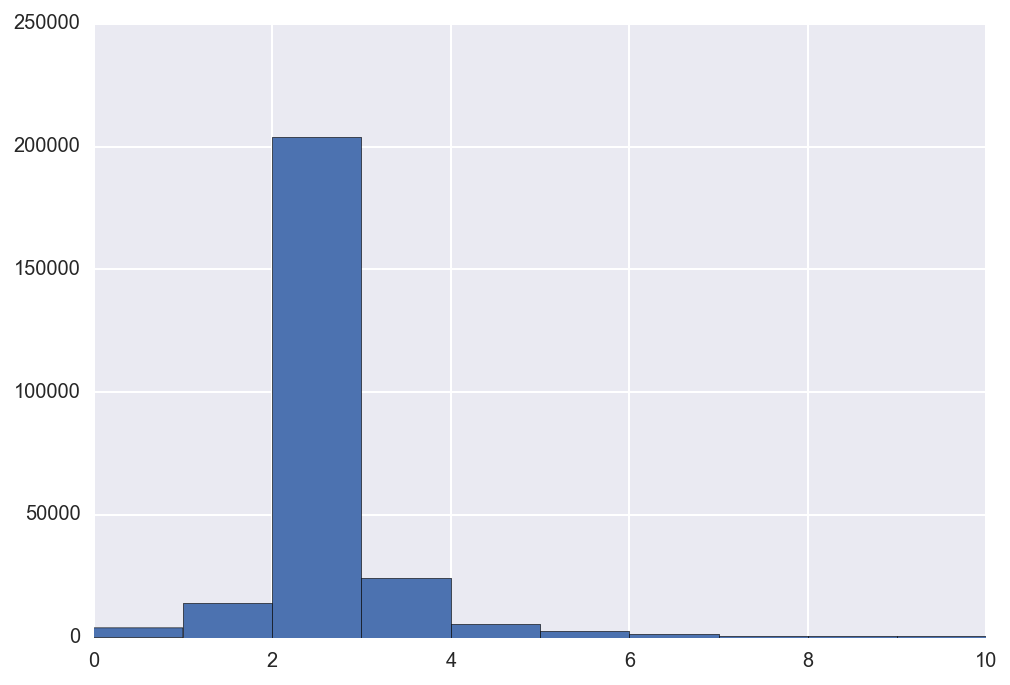

In [264]:
#print caption4[:100]
#count = len(re.findall(r'\w+', caption4[0]))
#print count
con = [ len(re.findall(r'\w+', i)) for i in all_names]
#print con

import numpy as np
import matplotlib.pyplot as plt

plt.hist(con,range=[0,10])

names_dedupe = remove_duplicates(all_names)

print len(names_dedupe)

In [252]:
#caption4

text = [i for i in all_names if len(re.findall(r'\w+', i)) == 2]
#canext((x for x in test_list if x.value == value), None)
print len(text)
print text

203857
['Julian Lethbridge', 'Tess Lethbridge', 'Simon Chase', 'Anne Bass', 'Scott Rothkopf', 'Peter Vaughn', 'Anne Bass', 'Steve Hochberg', 'Peter Vaughn', 'Kirsten Peckerman', 'Christine Flynn', 'Paul Segal', 'Bill Seitz', 'Joanna Seitz', 'Natalie Millstein', 'Jim Millstein', 'Julian Lethbridge', 'Morris Adjmi', 'Rick Childs', 'Dixie Deluca', 'David Deluca', 'Chuck Klein', 'Jane Klein', 'John Murphy', 'Linda Allard', 'Thomas Kelly', 'Morris Adjmi', 'Lisa Mahar', 'Philip Korsant', 'Peter Rockefeller', 'Donald Heald', 'David Whitman', 'Peter Stiglin', 'Chris Bruzzi', 'Hiram Williams', 'Paul Elconin', 'Dan Esty', 'Heather Payne', 'Peter Vaughn', 'Christine Armstrong', 'Ben Nickoll', 'Todd Payne', 'Andre Moura', 'Sophia Moura', 'Ben Nickoll', 'Christine Armstrong', 'John Funt', 'Richard Childs', 'Kirsten Peckerman', 'Jane Klein', 'Robert Couturier', 'Jeffrey Morgan', 'Robert Couturier', 'Hiram Williams', 'Linda Allard', 'Joanne Torti', 'Richard Louv', 'Catherine Rawson', 'Paul Segal', 'D

In [40]:
#import nltk

#r = []
#for i in range(0,len(caption1[:100])):
#    text = nltk.pos_tag(nltk.word_tokenize(caption1[i]))
#    s = sum(1 for a in text if a[1] in ('VB','VBD','VBG','VBN','VBP','VBZ'))
    #text1 = [i for i in text0 if 'VBP' == i[1]]
#    r.append(s)

#print r

#r.index(>0)

#print caption1[89] # do this later
#'CC' in nltk.pos_tag(text)[1]

SyntaxError: invalid syntax (<ipython-input-40-2b074470b9f5>, line 12)

In [253]:
import networkx as nx

In [265]:
g = nx.Graph()

In [266]:
g.nodes()

[]

In [267]:
g.add_nodes_from(names_dedupe)

In [269]:
from itertools import count, islice, chain, tee, ifilter, takewhile, dropwhile, combinations
from itertools import izip

In [280]:
edges = []
for a in caption3:
    x = list(combinations(a, 2))
    edges += x

In [282]:
list(combinations(caption3[0], 2))
print caption3[0]

['Julian Lethbridge', 'Tess Lethbridge', 'Simon Chase', 'Anne Bass', 'Scott Rothkopf']


In [283]:
g.add_edges_from(edges)

In [284]:
g.number_of_nodes()

111205

In [285]:
g.number_of_edges()

217487

In [475]:
print len(edges)

237267


In [593]:
for pair in edges:
    if g.has_edge(pair[0],pair[1]):
        g.edge[pair[0]][pair[1]]['weight'] = 0
        
for pair in edges:
    if g.has_edge(pair[0],pair[1]):
        g.edge[pair[0]][pair[1]]['weight'] += 1
    else:
        g.add_edge(pair[0], pair[1], weight=1)

In [609]:
weight1 = []
for pair in g.edges():
    weight1.append((g[pair[0]][pair[1]]['weight']))
print max(weight1)
print sum(weight1)
print len(weight1)

164
237268
200103


In [615]:
g.size(weight='weight')

237268.0

In [703]:
#g.has_edge(edges[1000][0],edges[1000][1])
#g.edge[edges[1000][0]][edges[1000][1]]['weight']
weight1 = []
for pair in g.edges():
    weight1.append((pair, (g[pair[0]][pair[1]]['weight'])))
#print max(weight1)
#print sum(weight1)
#print len(weight1)
bf = sorted(weight1, reverse=True, key=lambda tup: tup[1])

In [706]:
df3 = pd.DataFrame(bf)
df3[1].describe()

print bf[:50]

[(('', ''), 164), (('Gillian Miniter', 'Sylvester Miniter'), 121), (('Bonnie Comley', 'Stewart Lane'), 79), (('M.D.', 'M.D.'), 79), (('Jamee Gregory', 'Peter Gregory'), 71), (('Andrew Saffir', 'Daniel Benedict'), 67), (('Geoffrey Bradfield', 'Roric Tobin'), 66), (('Jay Diamond', 'Alexandra Lebenthal'), 51), (('Jean Shafiroff', 'Martin Shafiroff'), 51), (('Campion Platt', 'Tatiana Platt'), 49), (('Donald Tober', 'Barbara Tober'), 49), (('Somers Farkas', 'Jonathan Farkas'), 48), (('Yaz Hernandez', 'Valentin Hernandez'), 45), (('Sessa von Richthofen', 'Richard Johnson'), 42), (('Melissa Morris', 'Chappy Morris'), 41), (('Elizabeth Stribling', 'Guy Robinson'), 41), (('Peter Regna', 'Barbara Regna'), 39), (('Jonathan Tisch', 'Lizzie Tisch'), 39), (('Deborah Norville', 'Karl Wellner'), 38), (('Michael Kennedy', 'Eleanora Kennedy'), 36), (('Hilary Geary Ross', 'Wilbur Ross'), 35), (('Frederick Anderson', 'Douglas Hannant'), 34), (('Grace Meigher', 'Chris Meigher'), 34), (('Margo Catsimatidis'

In [722]:
#print q2[:2]
#q3 = bf[:150]
#del q2[24]
#q3.remove((('', 'Rubin Gur'), 14))
#for i in range(0,100):
#    print q2[i]

#for i in range(0,100):
#    print q3[i]
    
q3_final = q3[:100]
print q3_final

[(('Gillian Miniter', 'Sylvester Miniter'), 121), (('Bonnie Comley', 'Stewart Lane'), 79), (('Jamee Gregory', 'Peter Gregory'), 71), (('Andrew Saffir', 'Daniel Benedict'), 67), (('Geoffrey Bradfield', 'Roric Tobin'), 66), (('Jay Diamond', 'Alexandra Lebenthal'), 51), (('Jean Shafiroff', 'Martin Shafiroff'), 51), (('Campion Platt', 'Tatiana Platt'), 49), (('Donald Tober', 'Barbara Tober'), 49), (('Somers Farkas', 'Jonathan Farkas'), 48), (('Yaz Hernandez', 'Valentin Hernandez'), 45), (('Sessa von Richthofen', 'Richard Johnson'), 42), (('Melissa Morris', 'Chappy Morris'), 41), (('Elizabeth Stribling', 'Guy Robinson'), 41), (('Peter Regna', 'Barbara Regna'), 39), (('Jonathan Tisch', 'Lizzie Tisch'), 39), (('Deborah Norville', 'Karl Wellner'), 38), (('Michael Kennedy', 'Eleanora Kennedy'), 36), (('Hilary Geary Ross', 'Wilbur Ross'), 35), (('Frederick Anderson', 'Douglas Hannant'), 34), (('Grace Meigher', 'Chris Meigher'), 34), (('Margo Catsimatidis', 'John Catsimatidis'), 34), (('David Koc

In [517]:
g['Julian Lethbridge']['Simon Chase']['weight'] = 1
print g['Julian Lethbridge']['Simon Chase']

{'weight': 1}


In [642]:
dg = []
for i in names_dedupe:
    dg.append((i, g.degree(i,weight='weight')))


g.degree('Julian Lethbridge')

#sum(dg)

12

In [651]:
dg1 = sorted(dg, reverse=True, key=lambda tup: tup[1])
print dg1[:100]

[('', 2388), ('M.D.', 811), ('Jr.', 767), ('Jean Shafiroff', 695), ('Gillian Miniter', 557), ('Mark Gilbertson', 511), ('Alexandra Lebenthal', 391), ('Geoffrey Bradfield', 390), ('.', 369), ('Somers Farkas', 348), ('Yaz Hernandez', 340), ('Andrew Saffir', 335), ('Debbie Bancroft', 327), ('Sharon Bush', 302), ('Eleanora Kennedy', 295), ('Alina Cho', 294), ('Bonnie Comley', 271), ('Jamee Gregory', 270), ('Muffie Potter Aston', 268), ('Michael Bloomberg', 267), ('Lucia Hwong Gordon', 262), ('Mario Buatta', 260), ('Kamie Lightburn', 252), ('Allison Aston', 236), ('Bettina Zilkha', 228), ('Lydia Fenet', 226), ('CEO', 212), ('Daniel Benedict', 212), ('Elizabeth Stribling', 210), ('Stewart Lane', 208), ('Liliana Cavendish', 207), ('Barbara Tober', 207), ('Dennis Basso', 206), ('Patrick McMullan', 204), ('Karen LeFrak', 203), ('Deborah Norville', 201), ('Evelyn Lauder', 200), ('Amy Fine Collins', 199), ('Sylvester Miniter', 191), ('Fernanda Kellogg', 190), ('Diana Taylor', 190), ('Tory Burch',

In [631]:
df1 = pd.DataFrame(dg1[3:103])

In [632]:
df1[0].describe()

count    100.00000
mean     202.02000
std       93.33582
min      130.00000
25%      144.75000
50%      172.50000
75%      210.50000
max      695.00000
dtype: float64

In [652]:
pr = nx.pagerank(g, alpha=0.85,weight='weight')

TypeError: unhashable type

In [686]:
q2 = sorted(pr.items(), reverse=True, key=lambda tup: tup[1])[:150]

#print q2[:2]
for i in range(0,100):
    print q2[i]

('', 0.002350037523356763)
('Jr.', 0.0008123572727026335)
('.', 0.0007090831823103898)
('Jean Shafiroff', 0.00060592559295246)
('M.D.', 0.0006002191155109948)
('Mark Gilbertson', 0.0004611404319000443)
('Gillian Miniter', 0.00041865597507725937)
('Geoffrey Bradfield', 0.0003473020929882671)
('Andrew Saffir', 0.0003298711232864643)
('Alexandra Lebenthal', 0.0003265372933181894)
('Yaz Hernandez', 0.00029384946864394337)
('Mario Buatta', 0.0002849333000929472)
('Sharon Bush', 0.00028421856722867856)
('Somers Farkas', 0.00028219266192280564)
('Debbie Bancroft', 0.000273241837440032)
('Alina Cho', 0.00026441102379596817)
('Michael Bloomberg', 0.0002632954604970707)
('Lucia Hwong Gordon', 0.00024371089937275694)
('Bonnie Comley', 0.000239312475341876)
('Eleanora Kennedy', 0.00023868913867005265)
('Kamie Lightburn', 0.00022414583386632018)
('Barbara Tober', 0.00022230143647996293)
('Christopher Hyland', 0.0002194167375713618)
('Patrick McMullan', 0.00021722906378099567)
('Jamee Gregory', 0.00

In [700]:
#list( q2[i] for i in [3,5,range(6,10)] )
#print q2[:5]
#del q2[24]
#q2.remove(('family', 0.00013084664941739177))
#for i in range(0,100):
#    print q2[i]

q2_final = q2[:100]
print q2_final

[('Jean Shafiroff', 0.00060592559295246), ('Mark Gilbertson', 0.0004611404319000443), ('Gillian Miniter', 0.00041865597507725937), ('Geoffrey Bradfield', 0.0003473020929882671), ('Andrew Saffir', 0.0003298711232864643), ('Alexandra Lebenthal', 0.0003265372933181894), ('Yaz Hernandez', 0.00029384946864394337), ('Mario Buatta', 0.0002849333000929472), ('Sharon Bush', 0.00028421856722867856), ('Somers Farkas', 0.00028219266192280564), ('Debbie Bancroft', 0.000273241837440032), ('Alina Cho', 0.00026441102379596817), ('Michael Bloomberg', 0.0002632954604970707), ('Lucia Hwong Gordon', 0.00024371089937275694), ('Bonnie Comley', 0.000239312475341876), ('Eleanora Kennedy', 0.00023868913867005265), ('Kamie Lightburn', 0.00022414583386632018), ('Barbara Tober', 0.00022230143647996293), ('Christopher Hyland', 0.0002194167375713618), ('Patrick McMullan', 0.00021722906378099567), ('Jamee Gregory', 0.00021164500080370367), ('Elizabeth Stribling', 0.00021122933443584922), ('Muffie Potter Aston', 0.00

In [683]:
df2 = pd.DataFrame(sorted(pr.values(),reverse=True)[0:100])
sorted(pr, key=pr.__getitem__)[0:100]

['Sonya Morgan',
 'Paul McGill',
 'Purim Ball 2014 After Party',
 'Roxy Paine',
 'Gaelan Connell',
 'Jamie Lunar',
 'Tracy Wang',
 'Sandra Nielsen',
 'Keisha Whittaker',
 'Guests gather in front of Origami Holiday Tree',
 'Kerby Lewis',
 'Cocktails before one-time-only performance of A Mixed Bill For Bill.',
 'Kiki Vandeweghe',
 'Wendy Goldstein',
 'post-ceremony reception',
 'Eriq La Salle',
 'Victoria Silverstadt',
 'Harold Mitchell',
 'Jeremiah James sings I Surrender',
 'Beauty Queens',
 'Fussball Lessons',
 'Santa Arrives',
 'Jason Hamlin',
 'Azar Nafisi and',
 'Jon Stewart',
 'Hampton Showhouse Designers.',
 'Sarah de Lencquesaing and',
 'Tatiana von Furstenberg',
 'One of many boutique displays',
 'Boys will be boys',
 'Margaret Brown',
 'Packaging design by Scholarship Recipient Aaron Mickelson',
 'Donald Young',
 'Martha Stewart signature',
 'Patricia Kennedy surrounded by military families',
 'crowd in plaza on opening night',
 'Ciara.',
 'Dessert plate.',
 'Daun Hauspurg',
 

In [639]:
df2[0].describe()

count    100.000000
mean       0.000226
std        0.000244
min        0.000131
25%        0.000144
50%        0.000163
75%        0.000211
max        0.002350
dtype: float64

In [543]:
y = []
for i in g.edges():
    y.append(g.number_of_edges(*i))
max(y)

1

In [1]:
#x = []
#x.append(g.number_of_edges((1,0)))
#print x

In [503]:
len(g.edges())

200103

In [504]:
len(edges)

237267

In [606]:
len(edges)

237267